# Importing Packages

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# DataSet

In [113]:
X = np.linspace(0,10, 40)
Y_points = np.array([42.11114179981501, 32.116371029170224, 23.60838077838932, 21.71040663484652, 23.06138236340962, 40.35877406459923, 40.33403025230602, 25.717941800505223, 23.636208742887373, 22.28968297460542, 24.25029063632621, 30.22370103123695, 19.20981987344005, 22.752067420791448, 21.561381643821495, 21.768608306841813, 18.319691246119433, 25.481434972684376, 24.469571368984624, 33.978633488504954, 23.563963995773335, 35.8384691818414, 24.61790419024955, 21.82458699147527, 34.976333852942126, 34.601951442445696, 61.10673256940445, 57.46882897155589, 59.65955535914441, 62.42850874044409, 57.56405451602623, 61.05370856505004, 60.599782998520276, 59.397835525326734, 62.92098309449633, 63.899825431019366, 61.9930489502552, 62.43999285461545, 63.02254256377229, 61.48710499547727])

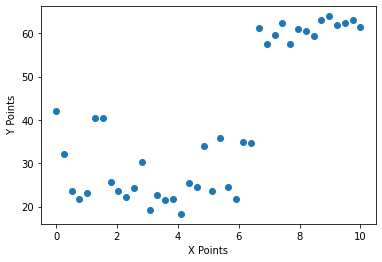

In [114]:
plt.scatter(X, Y_points)
plt.xlabel('X Points')
plt.ylabel(' Y Points')
plt.show()

# Cost Function

In [115]:
def compute_cost(X, Y, theta):
  H = np.dot(X, theta)
  difference = H - Y
  m = len(X)
  J = (1/(2*m))*np.dot(difference.T, difference)
  return np.squeeze(J)

# Gradient Descent Function

In [116]:
def gradient_of_cost_function(X, Y, theta):
  H = np.dot(X, theta)
  difference =  H - Y
  m = len(X)
  d_theta = (1/m) * (np.dot(X.T,difference))
  return d_theta

def gradient_descent(X, Y, theta, cost_diff_threshold, learning_rate):
  # To store the costs and theta values for each iteration
  thetas = [theta]
  costs = [compute_cost(X, Y, theta)]

  cost_diff = cost_diff_threshold + 1
  i = 0

  while(abs(cost_diff) > cost_diff_threshold):
      d_theta = gradient_of_cost_function(X, Y, theta)
      theta = theta - (learning_rate * d_theta)
      costs.append(compute_cost(X, Y, theta))
      thetas.append(theta)
      cost_diff = costs[i+1] - costs[i]
      if(cost_diff > 0):
          print("Diverging at iter:",i)
          break
      i+=1
          
  return thetas, costs

# Mean Square Error

In [117]:
def MSE(predicted_Y, actual_Y):
    difference = actual_Y - predicted_Y
    m = len(predicted_Y)
    mse = (1/m)*np.dot(difference.T, difference)
    return np.squeeze(mse)

# Standardize

In [118]:
def standardize(array, array_mean=None, array_std=None):
  array_mean = np.mean(array, axis = 0) if (array_mean is None) else array_mean.squeeze()
  array_std = np.std(array, axis = 0) if (array_std is None) else array_std.squeeze()

  standardized_array = (array - array_mean)/ array_std
  return standardized_array, array_mean, array_std


def destandardize(array, array_mean, array_std):
    return (array * array_std) + array_mean

# Evaluate

In [119]:
def evaluate(data_X, data_Y, theta):
    predicted_data_Y = np.dot(data_X, theta)
    mse = MSE(predicted_data_Y, data_Y)
    return mse, predicted_data_Y

# Plot Cost vs Iteration

In [120]:
def plot_cost_vs_iterations(x, y, theta, costs):
    fig = plt.figure()
    plt.plot(range(len(costs)), costs, c='r', alpha=0.8)
    hypothesis_cost = compute_cost(x, y, theta[-1])
    plt.annotate('cost : {}'.format(hypothesis_cost), xy = (0.2, 0.6), 
                    xycoords='axes fraction',color='#3c78d8ff', fontsize=12)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()

# plot learned curve

In [121]:
def visualize_learned_curve(X_values, predicted_Y_values):
    fig = plt.figure(dpi=100)
    plt.scatter(X, Y_points, c='royalblue',s=8) #plot all the points

    # For matplotlib to plot in order, need to sort the X-axis values. Hence, sorting the X values and corresponding Y values
    sorted_indices_X = np.argsort(X_values) 
    sorted_X = X_values[sorted_indices_X] 
    sorted_pred_Y = predicted_Y_values[sorted_indices_X] 

    plt.plot(sorted_X, sorted_pred_Y, c='#ff9800', linewidth=4)  # plot the curve learned

    plt.xlabel('X')
    plt.ylabel('Y')

    plt.show()

# Prepare Data

In [122]:
def prepare_data(x, y, per_index, train_count):
  shuffle_x = x[per_index]
  shuffle_y = y[per_index]

  train_x = shuffle_x[:train_count:]
  train_y = shuffle_y[:train_count:]

  val_x = shuffle_x[train_count:,:]
  val_y = shuffle_y[train_count:,:]

  return train_x, train_y, val_x, val_y

# Prepare X for given degree

In [123]:
def prepare_x(x, degree):
  x=x.reshape(-1,1)
  for i in range(2, degree+1):
    x_pow_values = np.power(x[:,0], i)
    x=np.append(x, x_pow_values.reshape(-1,1), axis=1)
  return x

# Prepare Theta

In [124]:
def get_initial_theta(degree):
    num_parameters = degree + 1
    theta = np.random.rand(num_parameters,1)
    return theta

# Apply Gradient Descent

In [125]:
np.random.seed(11235808)
data_count = X.shape[0]
permuted_indices = np.random.permutation(data_count)

train_ratio = 0.75
train_count = np.int(train_ratio * data_count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


## Theta values for given degree
<p> Change degree to get different curve

In [126]:
degree = 30
x_degree = prepare_x(X, degree)
y_col = Y_points.reshape(-1,1)
train_x, train_y, val_x, val_y = prepare_data(x_degree, y_col, permuted_indices, train_count)
theta = get_initial_theta(degree)


# Train the X values

In [127]:
cost_diff_threshold = 10e-5
learning_rate = 0.1 if (degree < 20) else 0.01
train_x_scaled, train_x_mean, train_x_std = standardize(train_x)
train_x_scaled = np.insert(train_x_scaled, 0, 1, axis = 1)
thetas_gd, costs = gradient_descent(train_x_scaled, train_y, theta, cost_diff_threshold, learning_rate)

# plot train_x cost vs iteration

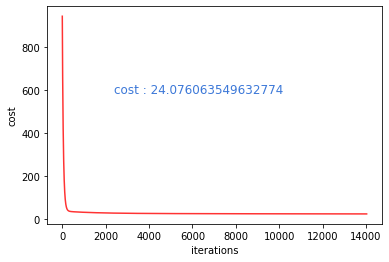

In [128]:
plot_cost_vs_iterations(train_x_scaled, train_y, thetas_gd, costs)


# Evaluate validataion dataset

In [129]:
val_x_scaled, _, __ = standardize(val_x, train_x_mean, train_x_std)
val_x_scaled = np.insert(val_x_scaled, 0, 1, axis=1)
mse, predicted_val_Y = evaluate(val_x_scaled, val_y, thetas_gd[-1])
print(mse)

29.487615708664634


In [130]:
_, predicted_y_points = evaluate(train_x_scaled, train_y, thetas_gd[-1])

# plot x points vs predictd y

In [131]:
x_all_points = np.hstack((train_x[:,0].ravel(), val_x[:0].ravel()))
predicted_Y = np.hstack((predicted_y_points.ravel(), predicted_val_Y.ravel()))

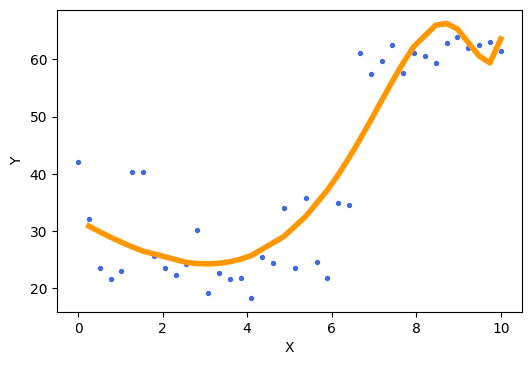

In [132]:
visualize_learned_curve(x_all_points, predicted_Y)